In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [ ]:
# Step 1: Load and Explore the Dataset
data = pd.read_csv("/content/post natal data.csv")
print("Dataset Loaded Successfully")
print("First 5 rows:")
print(data.head())

Dataset Loaded Successfully
First 5 rows:
         Timestamp    Age Feeling sad or Tearful  \
0  6/14/2022 20:02  35-40                    Yes   
1  6/14/2022 20:03  40-45                    Yes   
2  6/14/2022 20:04  35-40                    Yes   
3  6/14/2022 20:05  35-40                    Yes   
4  6/14/2022 20:06  40-45                    Yes   

  Irritable towards baby & partner Trouble sleeping at night  \
0                              Yes   Two or more days a week   
1                               No                        No   
2                               No                       Yes   
3                              Yes                       Yes   
4                               No   Two or more days a week   

  Problems concentrating or making decision Overeating or loss of appetite  \
0                                       Yes                            Yes   
1                                       Yes                            Yes   
2                         

In [ ]:
# Step 2: Data Cleaning and Preprocessing
# Drop unnecessary columns
data.drop(columns=['Timestamp'], inplace=True)
print("Dropped Timestamp column")

Dropped Timestamp column


In [ ]:
# Fill missing values with the most frequent value (mode)
data = data.apply(lambda x: x.fillna(x.mode()[0]))
print("Filled missing values with mode")

Filled missing values with mode


In [ ]:
# Convert categorical variables to numerical using Label Encoding
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])
print("Categorical columns encoded")

Categorical columns encoded


In [ ]:
# Step 3: Define Features and Target Variable
X = data.drop(columns=['Suicidal thoughts'])  # Features
y = data['Suicidal thoughts']  # Target

In [ ]:
# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets")

Data split into training and testing sets


In [ ]:
# Step 5: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Model Trained")

Random Forest Model Trained


In [ ]:
# Step 6: Make Predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       136
           1       1.00      0.91      0.96        70
           2       0.96      0.94      0.95        95

    accuracy                           0.96       301
   macro avg       0.97      0.95      0.96       301
weighted avg       0.96      0.96      0.96       301



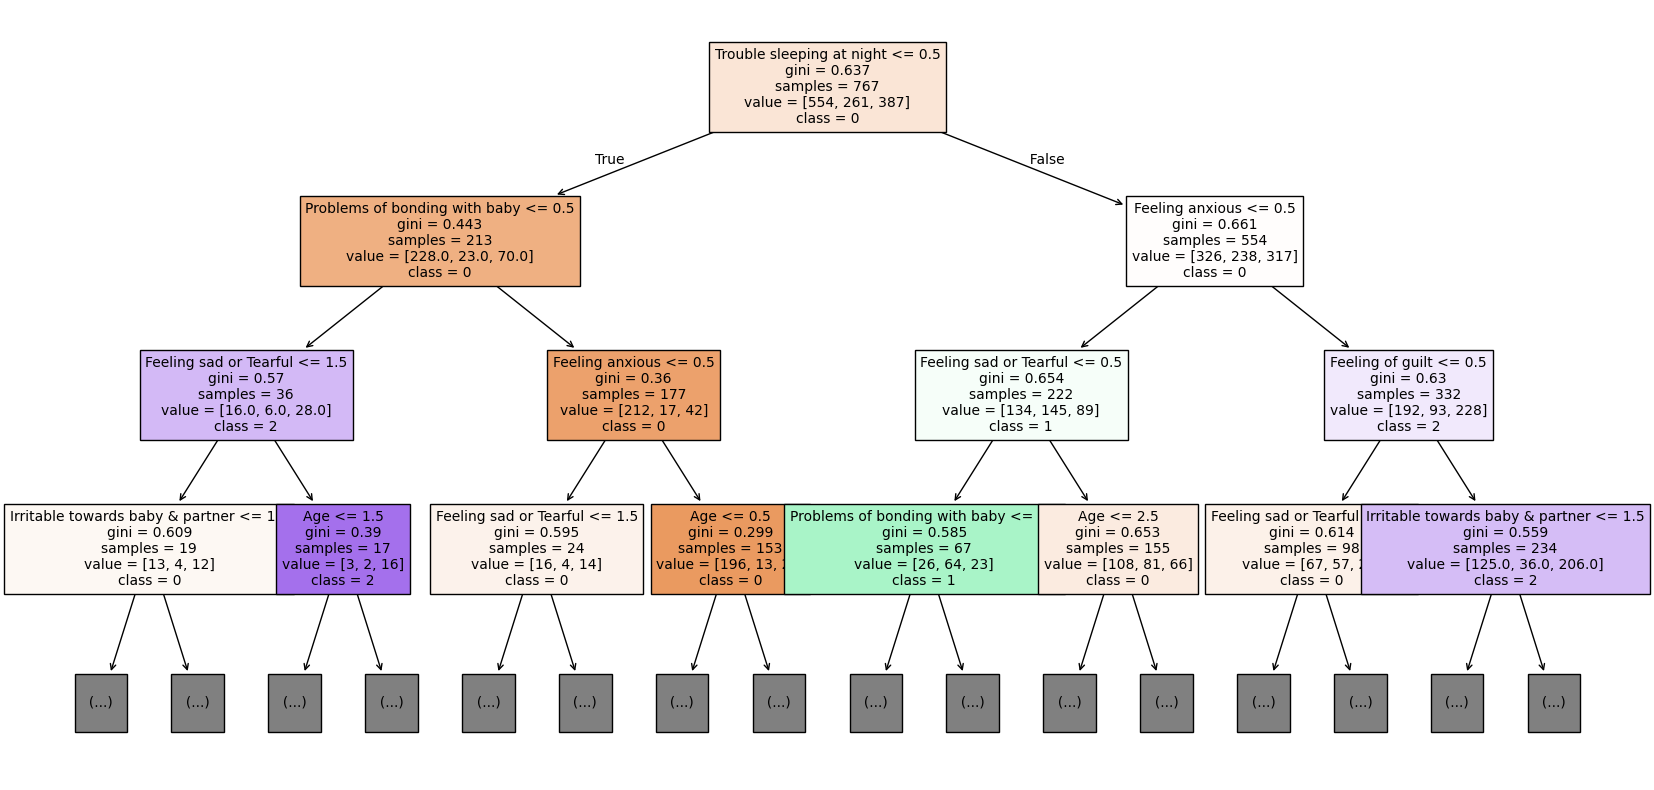

In [ ]:
# Step 8: Visualizations
# Ensure class names are dynamically retrieved
class_names = [str(cls) for cls in rf_model.classes_]

# Visualizing a Sample Decision Tree
plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=class_names, filled=True, max_depth=3, fontsize=10)
plt.show()

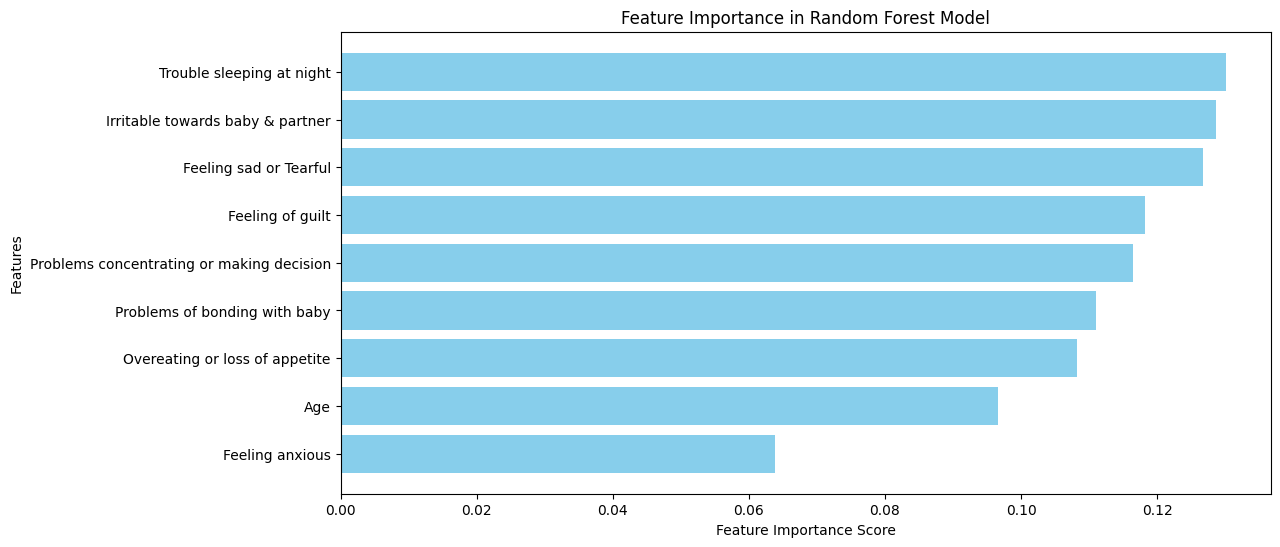

In [ ]:
# Feature Importance Visualization
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(12,6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

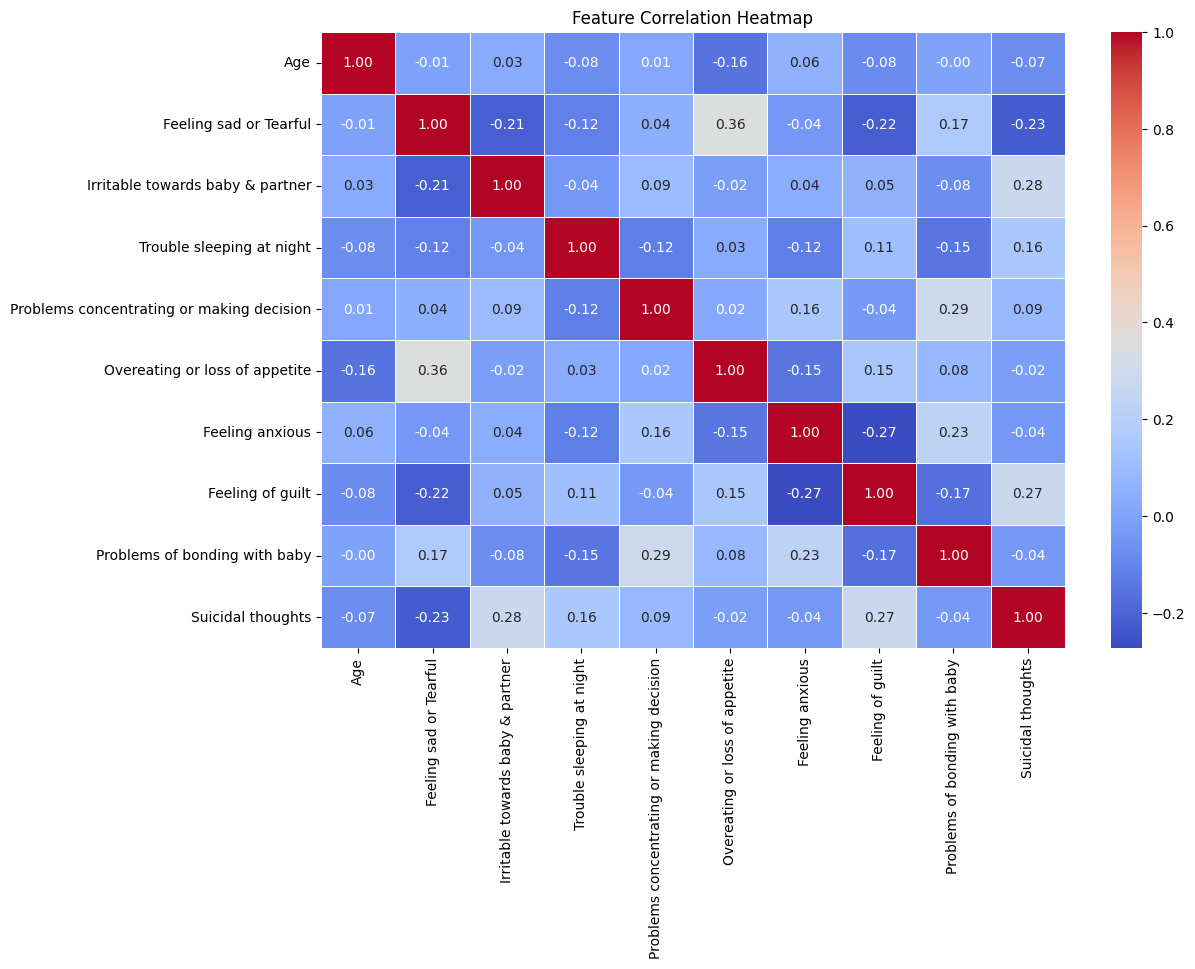

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

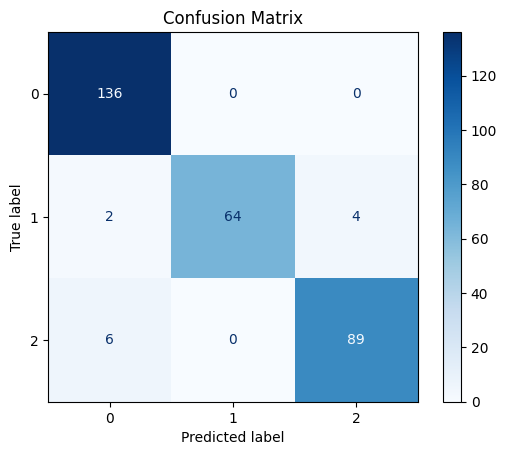

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(f'Random Forest Accuracy: {accuracy:.2f}')

Random Forest Accuracy: 0.96
